In [1]:
import wiggum as wg
import pandas as pd
import numpy as np
import timeit
import seaborn as sns

traffic
pearson.compute_correlation_table(labeled_df.df, 'agg_trend')
[0.3110418999999993, 0.1885134999999991, 0.17604229999999887, 0.17960579999999737, 0.17557670000000059, 0.1761057000000008, 0.1741521000000006, 0.18398679999999956, 0.17731889999999595, 0.17168750000000443]
pearson_2.compute_correlation_table(labeled_df.df, 'agg_trend')
[0.17684720000000453, 0.19002220000000136, 0.17158990000000074, 0.1832160000000016, 0.17518460000000147, 0.17000750000000409, 0.1963251000000028, 0.18404480000000234, 0.19532189999999616, 0.22490050000000394]
labeled_df.get_subgroup_trends_1lev([pearson])
[0.9878342000000018, 0.5154028000000039, 0.41148670000000465, 0.4298041999999995, 0.38097919999999874, 0.3723238999999978, 0.3894847999999982, 0.37908870000000405, 0.36943250000000205, 0.3764145999999968]
labeled_df.get_subgroup_trends_1lev([pearson_2])
[0.38655299999999926, 0.3937640999999985, 0.3805163000000036, 0.38484100000000154, 0.3773914000000005, 0.37588050000000095, 0.38578539999999606, 0.36

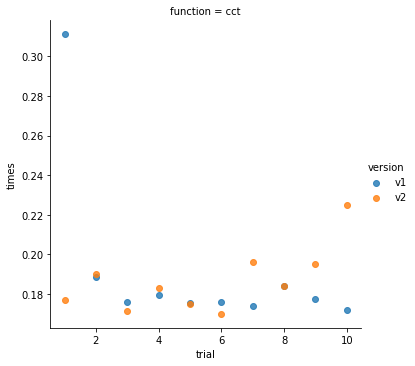

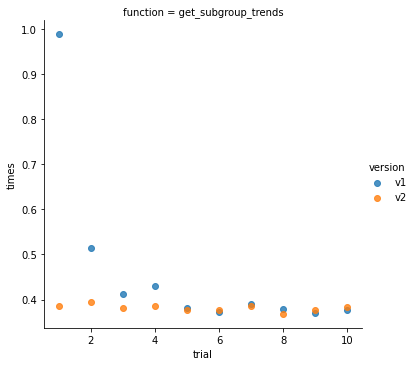

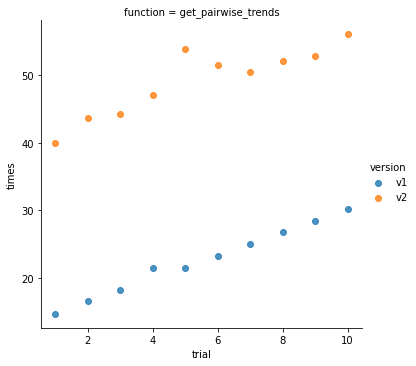

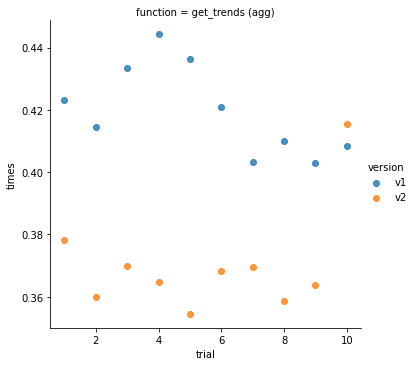

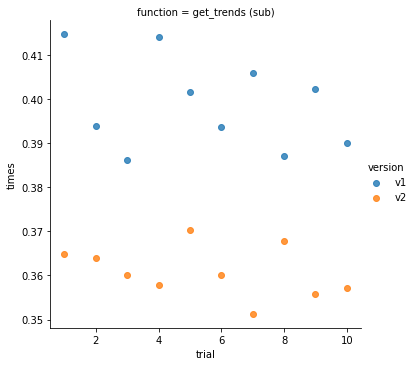

In [2]:
labeled_df = wg.LabeledDataFrame('data/ldf_state_hit_rate_min_cols_COCTFLILMDMAMOMTNENCOHRISCTXVTWAWI')

pearson = wg.All_Pearson()
pearson.get_trend_vars(labeled_df)
pearson.regression_vars
    
pearson_2 = wg.trends.All_Pearson_V2()
pearson_2.get_trend_vars(labeled_df)
pearson_2.regression_vars

objs=['pearson', 'pearson_2']
prereqs='from __main__ import labeled_df, pearson, pearson_2, objs, commands'
commands=["{}.compute_correlation_table(labeled_df.df, 'agg_trend')",
          'labeled_df.get_subgroup_trends_1lev([{}])',
          'labeled_df.get_pairwise_trends_1lev([{}])',
         "{}.get_trends(labeled_df.df, 'agg_trend')",
         "{}.get_trends(labeled_df.df, 'sub_trend')"]

def append_fun(func, j, function):
    i=0
    while i<j:
        function.append(func)
        i+=1
    return function

def test_scalability():
    times=[]
    for command in commands:
        for pearson_obj in objs:

            statement=command.format(pearson_obj)
            print(statement)
            t=timeit.repeat(statement, prereqs, repeat=10, number=100)
            times.append(t)
            print(t)
    timed = [ele for lis in times for ele in lis]
    return timed

def create_df(data_name):
    timings=test_scalability()
    function_names=['cct', 'get_subgroup_trends', 'get_trends (agg)', 'get_trends (sub)']
    result_df=pd.DataFrame(columns=['times', 'data', 'function'])
    # setting function column
    function=[]
    for ele in function_names:
        append_fun(ele, 20, function)
    print(len(function))
    # setting version column    
    versions=['v1', 'v2']
    version=[]
    i=0
    while i<5:
        j=0
        while j<10:
            version.append(versions[0])
            j+=1
        j=0
        while j<10:
            version.append(versions[1])
            j+=1
        i+=1
    # setting trial column
    trial=[]
    i=0
    while i<10:
        j=1
        while j<=10:
            trial.append(j)
            j+=1
        i+=1
        
    result_df['times']=timings
    result_df['function']=function
    result_df['data']=str(data_name)
    result_df['trial']=trial
    result_df['version']=version

    return result_df

def graph_tests():
    data_name=input()
    result=create_df(data_name)
    uni=result['function'].unique()
    for ele in uni:
        is_fun=result['function']==ele
        df=result[is_fun]
        print(df)
        sns.lmplot(x='trial', y='times', data=df, hue='version', col='function', fit_reg=False)

if __name__ == '__main__':
    graph_tests()

In [3]:
import mlsim